# Кластеризация и понижение размерности
Кластеризация — это метод машинного обучения, который включает группировку данных в пространстве признаков. Теоретически, точки, находящиеся в одной группе, должны иметь схожие свойства, в то время как точки в разных группах должны иметь сильно отличающиеся свойства.

Кластеризация является методом обучения без учителя и распространенным методом статистического анализа данных, используемым во многих областях. В частности используется при составлении портретов пользователей, поиска аномалий.

В анализе данных часто прибегают к кластеризации, чтобы получить ценную информацию из наших данных, наблюдая, в какие группы попадают точки при применении алгоритма кластеризации.

### K-средних
Напомним что сам алгоритм можно схематически представить в виде следующих шагов:
 1. Инициализируем центры кластеров случайно (должно быть задано количество кластеров).
 2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
 3. Производится пересчет центров кластеров по формуле центра масс всех точек принадлежащих кластеру.
 4. Пункты 2-3 повторяются до тех пор пока центры кластеров перестанут меняться (сильно).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.cluster import KMeans

np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

Посмотрим на то как он работает:

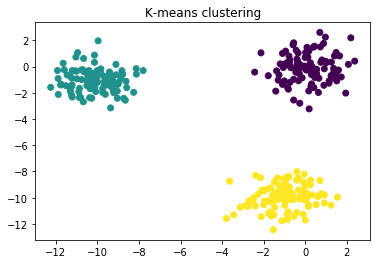

In [7]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

Посмотрим зависимость от числа кластеров:

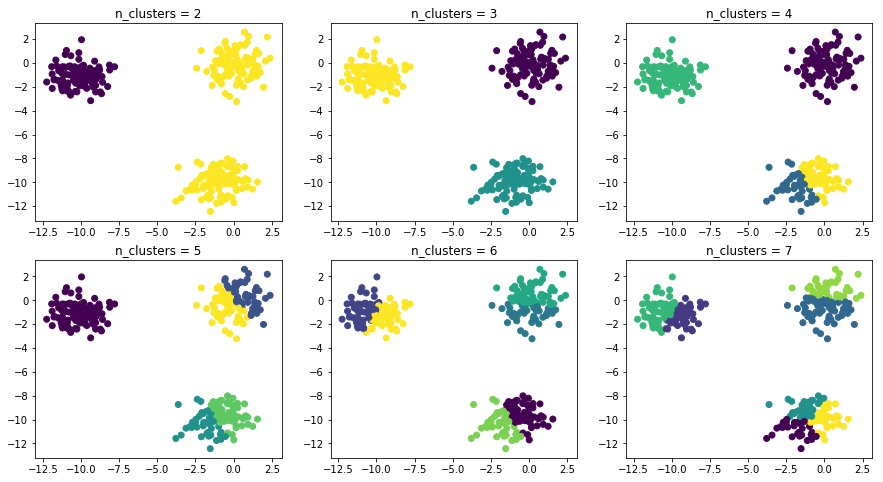

In [8]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))

plt.show()

## Иерархическая кластеризация
Другим вариантом к построению кластеров является иерархический подход, в котором алгоритм жадным образом строит кластера. Существует два варианта иерархической клаатеризации:

аггломеративная, в которой алгоритм на каждой итерации объединяет два меньших кластера в один
дивизивная, в которой алгоритм на каждой итерации разбивает один кластер на два более мелких
Мы рассмотрим аггломеративный подход к кластеризации (дивизивный можно рассмотреть по аналогии).

Опишем схематически алгоритм аггломеративной иерархической кластеризации:

Инициализируем наше множество кластеров, каждая точка считается свои кластером. То есть для выборки размера $N$ у нас на первой итерации будет $N$ кластеров. Также входным параметром алгоритму подается метрика расстояния между двумя кластерами. Перечислим методы объединения точек:
1. Single linkage — минимум попарных расстояний между точками из двух кластеров
$d(C_i, C_j) = min_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$
2. Complete linkage — максимум попарных расстояний между точками из двух кластеров
$d(C_i, C_j) = max_{x_i \in C_i, x_j \in C_j} ||x_i - x_j||$
3. Average linkage — среднее попарных расстояний между точками из двух кластеров
$d(C_i, C_j) = \frac{1}{n_i n_j} \sum_{x_i \in C_i} \sum_{x_j \in C_j} ||x_i - x_j||$
4. Centroid linkage — расстояние между центроидами двух кластеров
$d(C_i, C_j) = ||\mu_i - \mu_j||$

5. прирост суммы квадратов расстояний объектов до центра кластера, получаемого в результате их объединения: 
${\displaystyle \Delta =\sum _{i}{(x_{i}-{\bar {x}})^{2}}-\sum _{x_{i}\in A}(x_{i}-{\bar {a}})^{2}-\sum _{x_{i}\in B}(x_{i}-{\bar {b}})^{2}}
$

В соответствии с выбранным нами расстоянием два наиболее похожих кластера объединяются и предыдущий шаг повторяется вплоть до объединения всех точек один кластер.

В результате в данном подходе мы можем выбрать любое количество кластеров после завершения процедуры, просто остановив на нужном нам шаге. К тому же данный алгоритм гораздо менее чувствителен к выбору метрики между точками, тогда как другие алгоритмы сильно зависят от этого.

Для визуализации иерархической кластеризации удобно строить дендрограммы, в которых разница между уровнями равна выбранному расстоянию объединяющихся на данном этапе кластеров.

Посмотрим на иерархическую кластеризацию на примере:

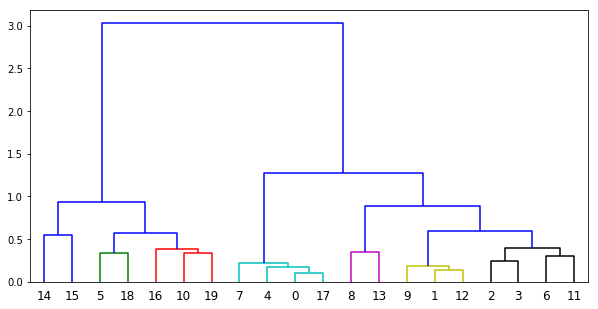

In [9]:
from sklearn.datasets import load_iris
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

iris = load_iris()
X = iris.data[:20]
distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

## Метод главных компонент (Principal Component Analysis, PCA)
Обозначим $X$ — матрица объекты-признаки, с нулевым средним каждого признака, а $w$ — некоторый единичный вектор. Тогда $Xw$ задает величину проекций всех объектов на этот вектор. Далее ищется вектор, который дает наибольшую дисперсию полученных проекций (то есть наибольшую дисперсию вдоль этого направления):

$$
    \max_{w: \|w\|=1} \| Xw \|^2 =  \max_{w: \|w\|=1} w^T X^T X w
$$
Подходящий вектор тогда равен собственному вектору матрицы $X^T X$ с наибольшим собственным значением. После этого все пространство проецируется на ортогональное дополнение к вектору $w$ и процесс повторяется.

### PCA на плоскости
Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


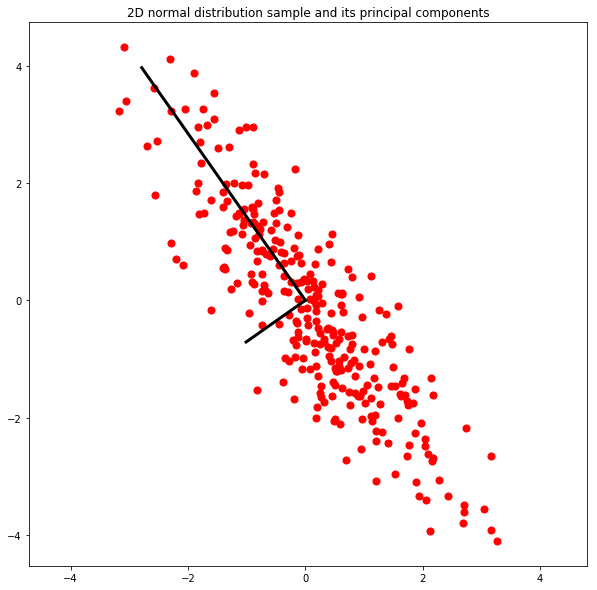

In [10]:
from sklearn.decomposition import PCA
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. 

Пример с набором данных:

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


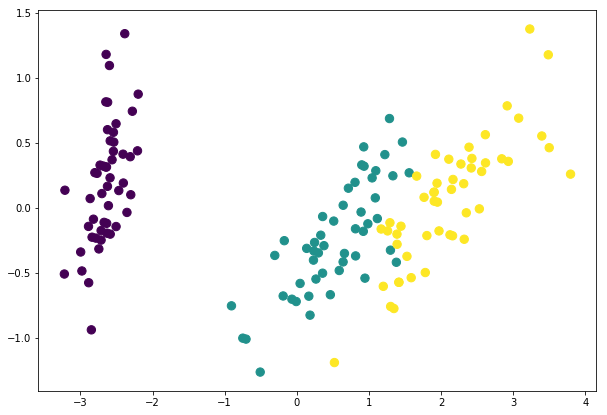

In [11]:
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

## Визуализация 
#### Метод t-SNE (t-distributed stochastic neighbor embedding)

Необходимо получить новую переменную, существующую в двумерном или трехмерном пространстве, которая бы в максимальной степени сохраняла структуру и закономерности в исходных данных. SNE начинается с преобразования многомерной евклидовой дистанции между точками в условные вероятности, отражающие сходство точек. Математически это выглядит следующим образом:
$$
    \rho(x_i, x_j)
    =
    \exp\left(
        -\frac{
            \|x_i - x_j\|^2
        }{
            2 \sigma^2
        }
    \right).
$$

Эта формула показывает, насколько точка $x_j$ близка к точке $x_i$ при гауссовом распределении вокруг $x_i$ с заданным отклонением σ. Сигма будет различной для каждой точки. Она выбирается так, чтобы точки в областях с большей плотностью имели меньшую дисперсию.
Отнормируем эти близости так, чтобы получить вектор распределений расстояний от объекта $x_j$ до всех
остальных объектов:
$$
    p(i |j)
    =
    \frac{
        \exp(-\|x_i - x_j\|^2 / 2 \sigma_j^2)
    }{
        \sum_{k \neq j} \exp(-\|x_k - x_j\|^2 / 2 \sigma_j^2)
    }
$$
Для простоты вычислений используется симметричная величина:
$$
    p_{ij}
    =
    \frac{p(i | j) + p(j | i)}{2N}.
$$
Перейдём теперь к измерению сходства в новом низкоразмерном пространстве.
Известно, что в пространствах высокой размерности можно разместить объекты так,
что их попарные расстояния будут близки,а вот сохранить это свойство в низкоразмерном
пространстве вряд ли возможно.
Поэтому будем измерять сходства между объектами с помощью распределения Коши, которое
имеет тяжёлые хвосты и не так сильно штрафует за увеличение расстояний между объектами:
$$
    q_{ij}
    =
    \frac{
        (1 + \|z_i - z_j\|^2)^{-1}
    }{
        \sum_{k \neq m} (1 + \|z_k - z_m\|^2)^{-1}
    }
$$

Теперь мы умеем измерять расстояния между объектами как в исходном, так и в новом пространствах,
и осталось лишь задать функционал ошибки проецирования.
Будем измерять ошибку с помощью дивергенции Кульбака-Лейблера,
которая часто используется для измерения расстояний между распределениями:
$$
    \text{KL}(p\ ||\ q)
    =
    \sum_{i \neq j}
        p_{ij} \log \frac{p_{ij}}{q_{ij}}
    \to
    \min_{z_1, \dots, z_\ell}
$$
Решать данную задачу оптимизации можно с помощью стохастического градиентного спуска.


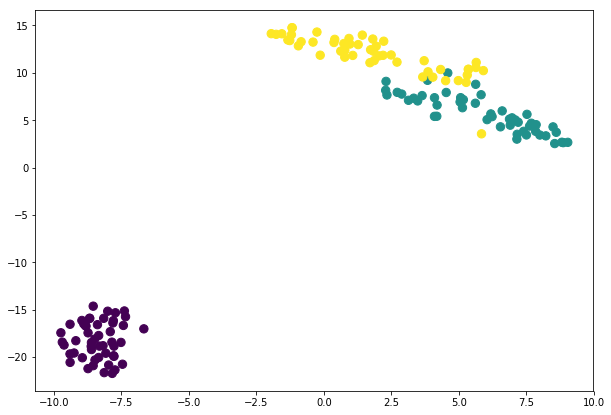

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=500)
X_reduced2 = tsne.fit_transform(X)
plt.figure(figsize=(10,7))
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y, s=70, cmap='viridis')
plt.show()